In [24]:
# Imports for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from helpers import target_data, plot_image_with_distance_crosshair



In [25]:
# Display the first few rows of the target data
target_data.head()

,ImageID,distance,location
0,0,351,"[215, 158]"
1,1,372,"[228, 269]"
2,2,488,"[255, 386]"
3,3,308,"[306, 426]"
4,4,67,"[248, 338]"


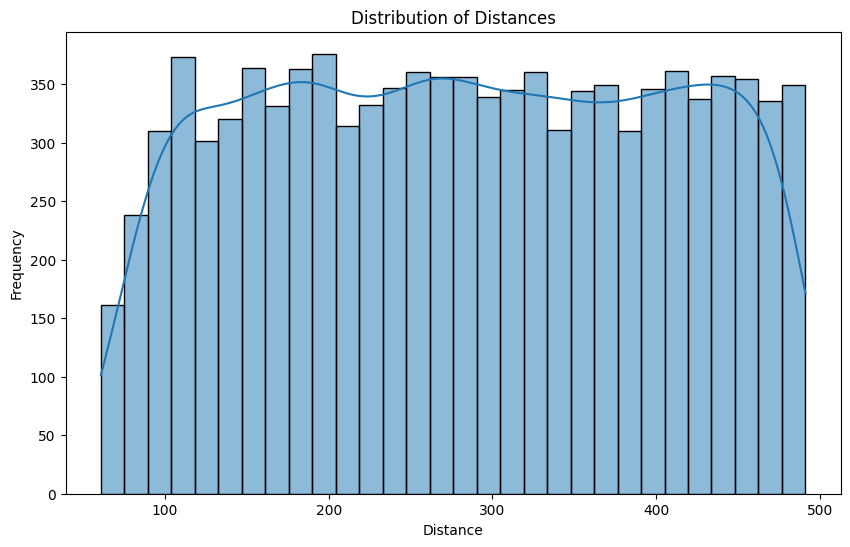

In [26]:
# Create histogram of distances
plt.figure(figsize=(10, 6))
sns.histplot(target_data['distance'], bins=30, kde=True)
plt.title('Distribution of Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

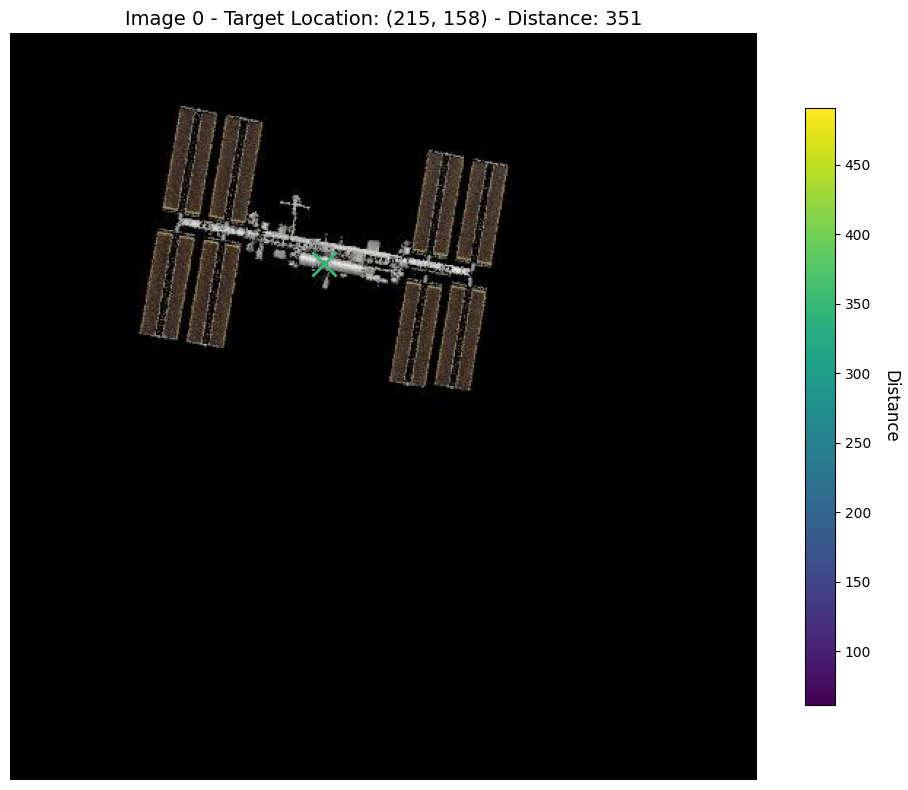

In [28]:
plot_image_with_distance_crosshair(0)

/var/folders/9t/rr1jg6x166j40yl1_5glmj7c0000gn/T/ipykernel_79903/644803995.py:38: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter([x], [y], c=[distance], cmap='viridis', s=300, marker='x',


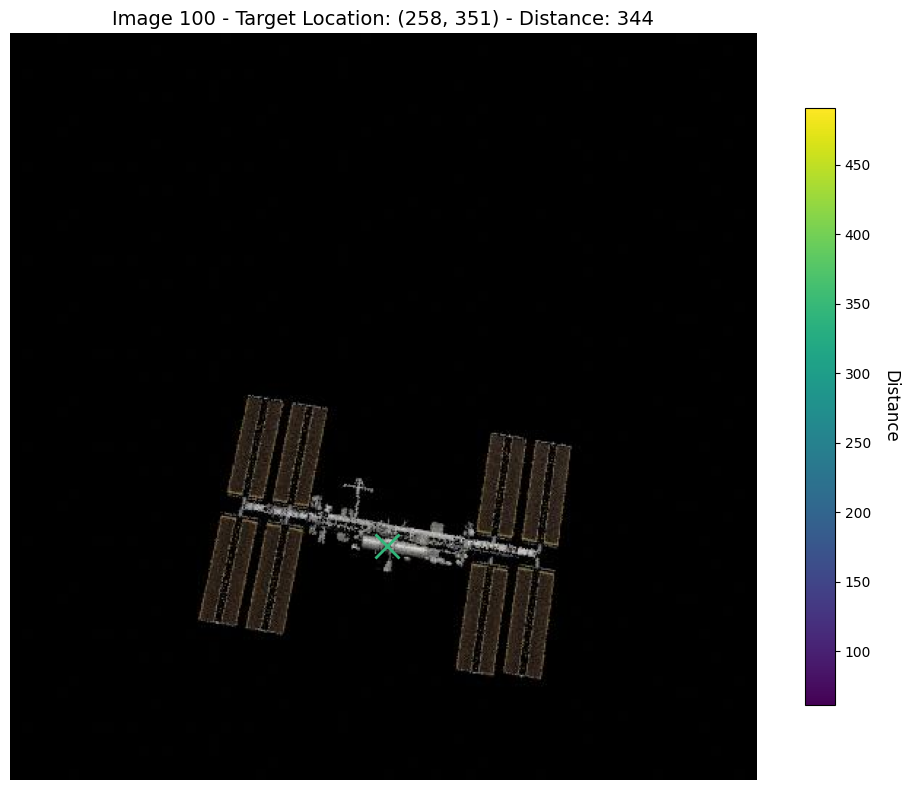

In [21]:
plot_image_with_distance_crosshair(100)

In [33]:
def add_two_numbers(a, b):
    return a + b

def multiply_two_numbers(a, b):
    return a * b

In [34]:
add_two_numbers(199, 1)

200

In [32]:
multiply_two_numbers(200, 2)

400


In [38]:
print(add_two_numbers(200, 2))

202


400